In [1]:
import os
import pandas as pd
import numpy as np

Kelompok : <br>
Anang Bagus Rahmadi (175150200111003) <br>
Felicia Marvela Evanita (175150200111082) <br>
Yunita Dwi Lestari (175150200111005)

# Implementasi Algoritma Naive Bayes dan K-Nearest Neighbor untuk Mendiagnosis Diabetes Melitus

Nur Hayati, Arif Nur Rahman <br>
Departement of Informatics Engineering <br>
Science and Technology Faculty <br>
Syarif Hidayatullah State Islamic University Jakarta

## Latar Belakang

Diabetes Melitus adalah salah satu penyakit tidak menular. Penyakit ini diprediksi akan meningkat 2-3 kali lipat pada 2030 oleh WHO(World Health Organization) dan IDF(International Diabetes Federation). Penyakit Diabetes ini sulit untuk di diagnosis oleh pasien yang kurang berpengalaman. Penulis Jurnal merasa solusi yang tepat untuk permasalahan ini adalah dengan membuat aplikasi yang dapat membantu para ahli dalam mendiagnosis penyakit diabetes. Data diambil dari riwayat kesehatan yang kemudian akan diklasifikasikan dengan algoritma Naive Bayes dan K-Nearest Neighbor. Pada Jurnal ini dicantumkan pula level ke akuratan yang mencapai 91% dan error 9%. 

## Penyelesaian Masalah

### Dataset

Dataset yang digunakan di penelitian penyakit Diabetes ini adalah data hasil test dari WHO(World Health Organization) pada wanita berumur 21 tahun keatas dari Pima, India. Terdapat 768 objek pada data yang dilampirkan tetapi hanya 300 data yang akan digunakan. Fitur pada data yang akan digunakan adalah Kehamilan, Toleransi Gula, Tekanan darah Diastolik, Ketebalan Kulit, Insulin, Body Mass Index, Diabetes Pedigree, Umur, dan Diagnosis.  

### Algoritma Naive Bayes 

#### 1. Memasukkan Dataset

In [3]:
data_path = os.path.join('diabetes.csv')
dataset = pd.read_csv(data_path, header=None)
dataset.columns = [
    "PregTest", "PlasGluCon", "DisBloPres",
    "TriSkinfoldThi", "2-HSerIns", "BMI",
    "DiaPedFunc", "Age", "Diagnosis"]

#### 2. Mengetahui Banyak Dataset dan Feature yang akan Digunakan

In [4]:
dataset.shape

(768, 9)

#### 3. Menampilkan dataset paling Atas

In [26]:
dataset.head(n=20)

,PregTest,PlasGluCon,DisBloPres,TriSkinfoldThi,2-HSerIns,BMI,DiaPedFunc,Age,Diagnosis
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


#### 4. Menampilkan Dataset Paling Bawah

In [27]:
dataset.tail(n=20)

,PregTest,PlasGluCon,DisBloPres,TriSkinfoldThi,2-HSerIns,BMI,DiaPedFunc,Age,Diagnosis
748,3,187,70,22,200.0,36.4,0.408,36,1
749,6,162,62,23,30.5,24.3,0.178,50,1
750,4,136,70,23,30.5,31.2,1.182,22,1
751,1,121,78,39,74.0,39.0,0.261,28,0
752,3,108,62,24,30.5,26.0,0.223,25,0
753,0,181,88,44,510.0,43.3,0.222,26,1
754,8,154,78,32,30.5,32.4,0.443,45,1
755,1,128,88,39,110.0,36.5,1.057,37,1
756,7,137,90,41,30.5,32.0,0.391,39,0
757,0,123,72,23,30.5,36.3,0.258,52,1


#### 5. Mencari Korelasi Matriks

Korelasi matriks penting untuk dicari agar kita dapat mengetahui korelasi antara karakteristik yang berbeda. 

In [28]:
corr = dataset.corr()
corr

,PregTest,PlasGluCon,DisBloPres,TriSkinfoldThi,2-HSerIns,BMI,DiaPedFunc,Age,Diagnosis
PregTest,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
PlasGluCon,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
DisBloPres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
TriSkinfoldThi,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
2-HSerIns,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiaPedFunc,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Diagnosis,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


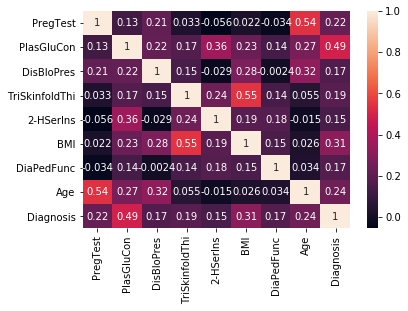

In [29]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

Dari data tersebut bisa diperkirakan bahwa semakin besar usia atau BMI pasien memiliki probabilitas yang lebih besar pasien dapat terkena diabetes.

#### 6. Menampilkan pesebaran data dari tiap feature

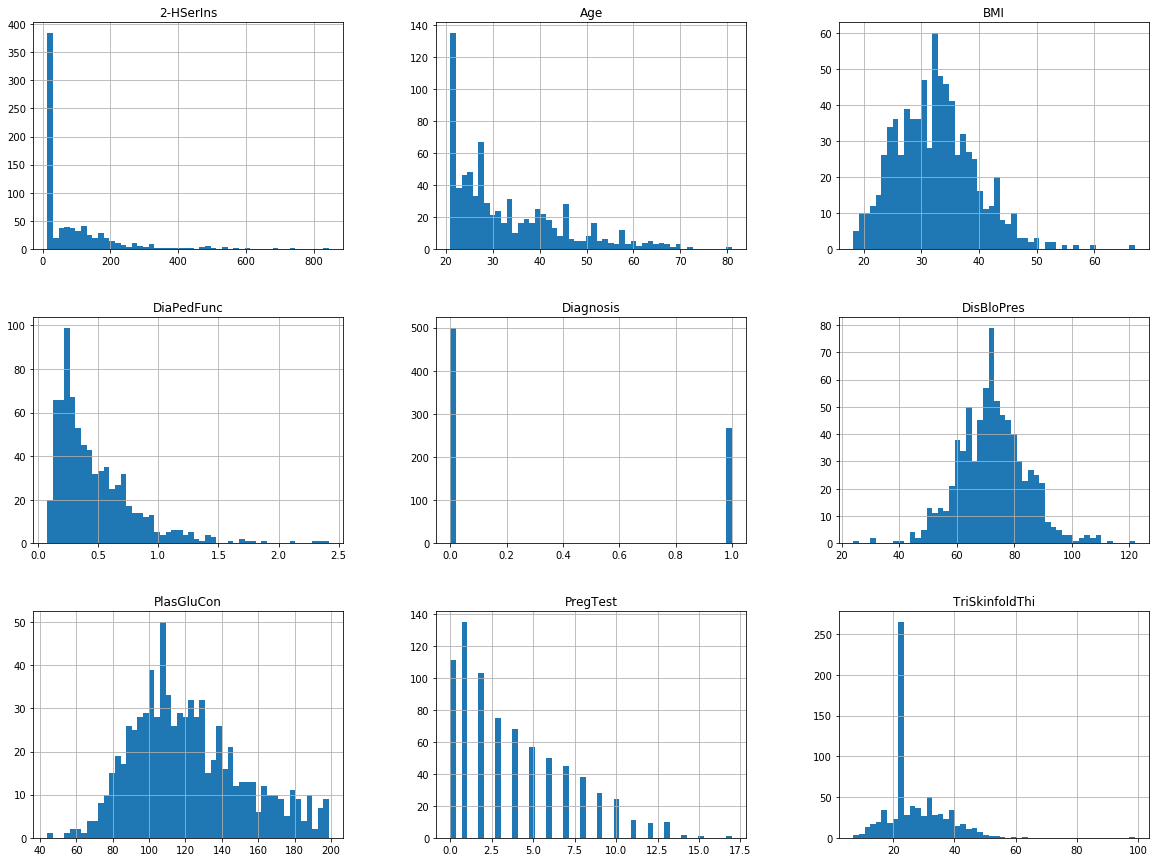

In [38]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

Memvisualisasikan data merupakan langkah penting dari analisis data. Dengan visualisasi grafis dari data kita memiliki pemahaman yang lebih baik dari berbagai nilai fitur distribusi: misalnya kita dapat memahami berapa rata-rata usia orang atau rata-rata BMI.

Hal penting yang dapat diperhatikan dalam dataset adalah ada beberapa orang yang memiliki nilai NULL (nol) untuk beberapa fitur: seperti BMI dan tekanan darah.

#### 7. Membersihkan data

Dapat diperhatikan dari analisis sebelumnya bahwa beberapa pasien memiliki nilai 0 dalam beberapa fitur. Algoritma machine learning tidak bekerja dengan baik ketika ada data yang hilang sehingga data harus "dibersihkan" terlebih dahulu. Pilihan termudah adalah dengan menghilangkan semua pasien dengan nilai null/nol, tetapi dengan cara ini dapat menghilangkan banyak data penting. Sehingga untuk mengatasi hal tersebut kita akan menghitung nilai median untuk kolom tertentu dan mengganti nilai itu di mana saja (di kolom yang sama) dimana ada nilai nol atau null. 

In [39]:
median_bmi = dataset['BMI'].median()
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = dataset['DisBloPres'].median()
dataset['DisBloPres'] = dataset['DisBloPres'].replace(
    to_replace=0, value=median_bloodp)

median_plglcconc = dataset['PlasGluCon'].median()
dataset['PlasGluCon'] = dataset['PlasGluCon'].replace(
    to_replace=0, value=median_plglcconc)

median_skinthick = dataset['TriSkinfoldThi'].median()
dataset['TriSkinfoldThi'] = dataset['TriSkinfoldThi'].replace(
    to_replace=0, value=median_skinthick)

median_twohourserins = dataset['2-HSerIns'].median()
dataset['2-HSerIns'] = dataset['2-HSerIns'].replace(
    to_replace=0, value=median_twohourserins)

Tidak semua Kolom dengan nilai null perlu diubah, karena ada beberapa data yang memang bisa memiliki nilai 0 seperti "Jumlah Kehamilan"

#### 8. Mengetahui Posisi Data yang Termasuk Diabetes

In [40]:
Diabetes = np.where(dataset['Diagnosis']==1)
print("Pasien yang Diabetes berada di data indeks ke- \n",Diabetes[0])

Pasien yang Diabetes berada di data indeks ke- 
 [  0   2   4   6   8   9  11  13  14  15  16  17  19  22  23  24  25  26
  31  37  38  39  43  45  48  53  56  61  64  66  70  72  78  84  88  93
  99 100 109 110 111 114 115 116 120 124 125 128 129 130 131 132 143 152
 154 155 159 164 165 170 171 175 177 179 185 186 187 188 189 192 193 195
 197 198 199 206 207 209 213 214 215 216 218 219 220 221 227 230 231 235
 236 237 238 242 243 245 254 255 259 261 264 266 269 270 276 280 283 284
 287 291 292 293 296 298 300 301 303 306 308 309 312 314 317 319 321 322
 323 326 328 332 337 338 339 349 355 356 357 359 360 363 366 369 370 375
 378 386 387 388 391 394 397 399 400 402 404 406 408 409 414 415 417 419
 424 425 427 429 435 440 443 444 445 448 451 455 458 468 476 480 484 485
 493 498 502 506 510 515 516 523 535 539 540 541 542 545 546 560 561 569
 577 579 580 584 586 588 590 592 595 598 603 604 606 611 612 614 618 619
 630 635 638 642 646 647 648 655 659 661 662 663 664 666 667 675 676 678
 6

#### 9. Mengetahui Posisi Data Yang Termasuk Tidak Diabetes

In [41]:
TidakDiabetes = np.where(dataset['Diagnosis']==0)
print("\nPasien yang Tidak Diabetes berada di data indeks ke- \n",TidakDiabetes[0])


Pasien yang Tidak Diabetes berada di data indeks ke- 
 [  1   3   5   7  10  12  18  20  21  27  28  29  30  32  33  34  35  36
  40  41  42  44  46  47  49  50  51  52  54  55  57  58  59  60  62  63
  65  67  68  69  71  73  74  75  76  77  79  80  81  82  83  85  86  87
  89  90  91  92  94  95  96  97  98 101 102 103 104 105 106 107 108 112
 113 117 118 119 121 122 123 126 127 133 134 135 136 137 138 139 140 141
 142 144 145 146 147 148 149 150 151 153 156 157 158 160 161 162 163 166
 167 168 169 172 173 174 176 178 180 181 182 183 184 190 191 194 196 200
 201 202 203 204 205 208 210 211 212 217 222 223 224 225 226 228 229 232
 233 234 239 240 241 244 246 247 248 249 250 251 252 253 256 257 258 260
 262 263 265 267 268 271 272 273 274 275 277 278 279 281 282 285 286 288
 289 290 294 295 297 299 302 304 305 307 310 311 313 315 316 318 320 324
 325 327 329 330 331 333 334 335 336 340 341 342 343 344 345 346 347 348
 350 351 352 353 354 358 361 362 364 365 367 368 371 372 373 374 376

#### 10. Menghitung Nilai Mean untuk setiap Feature pada Dataset yang termasuk Diabetes

#### Rumus Mean
### $$ Mean = \frac {\Sigma X_i}{N} $$

In [34]:
print ("Nilai Mean dari data yang termasuk Diabetes")
print()

MeanDiabetes = np.mean(dataset.where(dataset['Diagnosis']==1))
#print (MeanDiabetes)
MDiab = np.array(MeanDiabetes[0:8])
print (MDiab)

Nilai Mean dari data yang termasuk Diabetes

[  4.86567164 142.13059701  75.12313433  29.71641791 116.04104478
  35.38134328   0.5505      37.06716418]


#### 11. Menghitung Nilai Mean untuk setiap Feature pada Dataset yang termasuk Tidak Diabetes

In [35]:
print ("Nilai Mean dari data yang termasuk Tidak Diabetes")
print()

MeanTdkDiabetes = np.mean(dataset.where(dataset['Diagnosis']==0))
#print (MeanDiabetes)
MTdkDiab = np.array(MeanTdkDiabetes[0:8])
print (MTdkDiab)

Nilai Mean dari data yang termasuk Tidak Diabetes

[  3.298    110.682     70.92      26.058     83.188     30.8802
   0.429734  31.19    ]


#### 12. Menghitung Standar Deviasi dari dataset Diabetes

#### Rumus STD
### $$ STD = \sqrt{ \frac{\Sigma(X - \mu)^2}{N}}    $$

In [36]:
print ("Nilai Standart Deviasi dari dataset Diabetes")
print ()

STDDiabetes = np.std(dataset.where(dataset['Diagnosis']==1))
#print (MeanDiabetes)
STDDiab = np.array(STDDiabetes[0:8])
print (STDDiab)

Nilai Standart Deviasi dari dataset Diabetes

[  3.7342526   29.51362126  11.92935308   9.65881543 127.45063499
   6.58438528   0.37165914  10.94777137]


#### 13. Menghitung Standar Deviasi dari Dataset Tidak Diabetes

In [37]:
print ("Nilai Standart Deviasi dari dataset Tidak Diabetes")
print ()

STDTdkDiabetes = np.std(dataset.where(dataset['Diagnosis']==0))
#print (MeanDiabetes)
STDTdkDiab = np.array(STDTdkDiabetes[0:8])
print (STDTdkDiab)

Nilai Standart Deviasi dari dataset Tidak Diabetes

[ 3.01416589 24.68248116 11.91744939  8.71680194 89.47608986  6.4965674
  0.29878607 11.6559813 ]


#### 14. Menghitung Probabilitas Prior dari Dataset Diabetes dan Tidak Diabetes

#### Rumus
### $$ Prior = \frac {\Sigma X}{N}$$

In [18]:
PriorDiabetes = len(Diabetes[0])/len(dataset)
print ("Nilai Probabilitas Prior dari dataset Diabetes")
print(PriorDiabetes)

PriorTdkDiabetes = len(TidakDiabetes[0])/len(dataset)
print ("Nilai Probabilitas Prior dari dataset Tidak Diabetes")
print(PriorTdkDiabetes)

Nilai Probabilitas Prior dari dataset Diabetes
0.3489583333333333
Nilai Probabilitas Prior dari dataset Tidak Diabetes
0.6510416666666666


#### 15. Mendefinisikan Nilai yang akan di Uji  dan menghitung probabilitas posterior, likelihood dan hasil naive bayes

In [19]:
def posterior(x):
    PDiabetes =  (np.e ** (-((baru[x][0:8] - MDiab)**2)/(2 * (STDDiab**2))))/(np.sqrt(2 * np.pi) * STDDiab)
    ProbDiabet = np.array(PDiabetes[0:8])
    print ("Probabilitas Posterior Diabetes :")
    print(ProbDiabet)
    
    PTdkDiabetes =  (np.e ** (-((baru[x][0:8] - MTdkDiab)**2)/(2 * (STDTdkDiab**2))))/(np.sqrt(2 * np.pi) * STDTdkDiab)
    ProbTdkDiabet = np.array(PTdkDiabetes[0:8])
    print ("Probabilitas Posterior Tidak Diabetes :")
    print(ProbTdkDiabet)
    
    LikeDiabBaru = 1
    for a in ProbDiabet:
        LikeDiabBaru *= a
    LikeDiab = LikeDiabBaru * PriorDiabetes
    print ("Likelihood dari dataset Diabetes :",LikeDiab)

    LikeTdkDiabBaru = 1
    for b in ProbTdkDiabet:
        LikeTdkDiabBaru *= b   
    LikeTdkDiab = LikeTdkDiabBaru * PriorTdkDiabetes
    print ("Likelihood dari dataset Tidak Diabetes :", LikeTdkDiab)

    NormDiabetes = LikeDiab / (LikeDiab + LikeTdkDiab)
    print("Norm Diabetes :", NormDiabetes)
    NormTdkDiabetes = LikeTdkDiab / (LikeDiab + LikeTdkDiab)
    print("Norm Tidak Diabetes :", NormTdkDiabetes)

    if np.all(NormDiabetes > NormTdkDiabetes):
        diab = 1
        print("Data ke", (x + 1), "termasuk Diabetes")
    else:
        diab = 0
        print("Data ke", (x + 1), "termasuk Tidak Diabetes")
    return diab

def check(diab):
    if (diab == baru[x][8]):
        print("Analisis data ke", [x+1], "benar")
        salah = 0
    else:
        print("Analisis sata ke", [x+1], "salah")
        salah = 1
    print()
    return salah

In [20]:
import time
baru = dataset.head(n = 350).T
print(baru)
hasil = 0
start = time.time()
for x in baru:
    diab = posterior(x)
    hasil += check(diab)
print("Jumlah salah :", hasil)
end = time.time()
print()
print("Waktu yang dibutuhkan pada algoritma Naive Bayes adalah", (end-start), "detik.")

                    0       1        2       3        4        5       6    \
PregTest          6.000   1.000    8.000   1.000    0.000    5.000   3.000   
PlasGluCon      148.000  85.000  183.000  89.000  137.000  116.000  78.000   
DisBloPres       72.000  66.000   64.000  66.000   40.000   74.000  50.000   
TriSkinfoldThi   35.000  29.000   23.000  23.000   35.000   23.000  32.000   
2-HSerIns        30.500  30.500   30.500  94.000  168.000   30.500  88.000   
BMI              33.600  26.600   23.300  28.100   43.100   25.600  31.000   
DiaPedFunc        0.627   0.351    0.672   0.167    2.288    0.201   0.248   
Age              50.000  31.000   32.000  21.000   33.000   30.000  26.000   
Diagnosis         1.000   0.000    1.000   0.000    1.000    0.000   1.000   

                    7        8        9    ...      340     341      342  \
PregTest         10.000    2.000    8.000  ...    1.000   1.000    1.000   
PlasGluCon      115.000  197.000  125.000  ...  130.000  95.000  11

Likelihood dari dataset Diabetes : 1.1184709107427751e-13
Likelihood dari dataset Tidak Diabetes : 5.087812012808731e-15
Norm Diabetes : 0.9564902191006253
Norm Tidak Diabetes : 0.04350978089937465
Data ke 25 termasuk Diabetes
Analisis data ke [25] benar

Probabilitas Posterior Diabetes :
[0.04151503 0.0114217  0.03049609 0.03835642 0.00313007 0.04904403
 0.69680293 0.03416342]
Probabilitas Posterior Tidak Diabetes :
[0.01117318 0.01366001 0.03337588 0.04576603 0.00418557 0.06137303
 1.0062383  0.0240186 ]
Likelihood dari dataset Diabetes : 7.072989370004411e-13
Likelihood dari dataset Tidak Diabetes : 9.423074238694323e-13
Norm Diabetes : 0.428768313325045
Norm Tidak Diabetes : 0.571231686674955
Data ke 26 termasuk Tidak Diabetes
Analisis sata ke [26] salah

Probabilitas Posterior Diabetes :
[0.09073397 0.01333449 0.03335185 0.03243306 0.00249891 0.05029288
 0.7858612  0.03146391]
Probabilitas Posterior Tidak Diabetes :
[0.06225603 0.00547505 0.03056825 0.04303562 0.00374894 0.0259875

Probabilitas Posterior Tidak Diabetes :
[7.27401283e-02 3.13235369e-04 3.07409193e-02 1.52011232e-02
 3.74893994e-03 1.41920650e-02 8.26873809e-06 2.97249297e-02]
Likelihood dari dataset Diabetes : 1.757199785675798e-16
Likelihood dari dataset Tidak Diabetes : 9.064843653221943e-20
Norm Diabetes : 0.9994843972854377
Norm Tidak Diabetes : 0.0005156027145622958
Data ke 46 termasuk Diabetes
Analisis data ke [46] benar

Probabilitas Posterior Diabetes :
[0.06251815 0.01340155 0.0092531  0.03243306 0.00249891 0.0417567
 1.07270113 0.0277764 ]
Probabilitas Posterior Tidak Diabetes :
[0.09897495 0.0058066  0.01528893 0.04303562 0.00374894 0.06040318
 1.20698011 0.03362758]
Likelihood dari dataset Diabetes : 2.727978428486779e-13
Likelihood dari dataset Tidak Diabetes : 2.26268994405854e-12
Norm Diabetes : 0.10759185836246368
Norm Tidak Diabetes : 0.8924081416375362
Data ke 47 termasuk Tidak Diabetes
Analisis data ke [47] benar

Probabilitas Posterior Diabetes :
[7.95842653e-02 7.40587621e-04 

Probabilitas Posterior Tidak Diabetes :
[0.12881437 0.0058066  0.01665796 0.04550058 0.00438063 0.05862077
 0.96512959 0.03208495]
Likelihood dari dataset Diabetes : 8.48453410658267e-13
Likelihood dari dataset Tidak Diabetes : 2.9350070210968775e-12
Norm Diabetes : 0.22425327975867587
Norm Tidak Diabetes : 0.7757467202413242
Data ke 70 termasuk Tidak Diabetes
Analisis data ke [70] benar

Probabilitas Posterior Diabetes :
[0.07958427 0.00487974 0.02496271 0.0249024  0.00306551 0.05643597
 0.74694748 0.02586024]
Probabilitas Posterior Tidak Diabetes :
[0.1206352  0.01471806 0.03074092 0.03594773 0.00444574 0.05851087
 0.45758579 0.03296832]
Likelihood dari dataset Diabetes : 2.815214366088002e-13
Likelihood dari dataset Tidak Diabetes : 5.012704253803691e-12
Norm Diabetes : 0.05317518615018958
Norm Tidak Diabetes : 0.9468248138498104
Data ke 71 termasuk Tidak Diabetes
Analisis sata ke [71] salah

Probabilitas Posterior Diabetes :
[0.10676414 0.01344139 0.02165235 0.03556384 0.00307535 0

 1.33389502 0.03324612]
Likelihood dari dataset Diabetes : 8.494388230049536e-13
Likelihood dari dataset Tidak Diabetes : 4.285283488843027e-12
Norm Diabetes : 0.16543033321294479
Norm Tidak Diabetes : 0.8345696667870551
Data ke 92 termasuk Tidak Diabetes
Analisis data ke [92] benar

Probabilitas Posterior Diabetes :
[0.09073397 0.00158232 0.03248362 0.02343358 0.00271443 0.01382681
 0.79252296 0.03292295]
Probabilitas Posterior Tidak Diabetes :
[0.06225603 0.00784327 0.02805996 0.01273635 0.00412686 0.00316668
 1.13840471 0.02226337]
Likelihood dari dataset Diabetes : 3.7346709977278785e-14
Likelihood dari dataset Tidak Diabetes : 3.762966644569809e-14
Norm Diabetes : 0.49811302918386574
Norm Tidak Diabetes : 0.5018869708161342
Data ke 93 termasuk Tidak Diabetes
Analisis data ke [93] benar

Probabilitas Posterior Diabetes :
[0.10400084 0.01301391 0.03231542 0.03243306 0.00249891 0.01290007
 0.81879055 0.00406207]
Probabilitas Posterior Tidak Diabetes :
[0.12881437 0.01034472 0.0333383

Analisis data ke [111] benar

Probabilitas Posterior Diabetes :
[7.51148718e-02 1.22913433e-02 1.82604356e-02 3.83564206e-02
 3.76507769e-05 5.92703797e-02 1.07319049e+00 2.61224084e-02]
Probabilitas Posterior Tidak Diabetes :
[3.92026652e-02 3.22447091e-03 2.52973641e-02 4.57660335e-02
 1.12049459e-07 5.47203580e-02 1.24263650e+00 1.52685460e-02]
Likelihood dari dataset Diabetes : 1.4117238220658908e-14
Likelihood dari dataset Tidak Diabetes : 1.1084136511270528e-17
Norm Diabetes : 0.9992154669017977
Norm Tidak Diabetes : 0.0007845330982022282
Data ke 112 termasuk Diabetes
Analisis data ke [112] benar

Probabilitas Posterior Diabetes :
[0.06251815 0.00267405 0.03335185 0.03743493 0.00258256 0.04952504
 0.67409736 0.01596108]
Probabilitas Posterior Tidak Diabetes :
[0.09897495 0.01098903 0.03056825 0.03021988 0.00390248 0.06133381
 0.97291992 0.02673954]
Likelihood dari dataset Diabetes : 1.0023207467064596e-13
Likelihood dari dataset Tidak Diabetes : 4.073127278815808e-12
Norm Diabete

Probabilitas Posterior Diabetes :
[0.04571312 0.00612622 0.02535454 0.03243306 0.00249891 0.03177285
 0.94127252 0.00272461]
Probabilitas Posterior Tidak Diabetes :
[0.07274013 0.01574033 0.01832937 0.04303562 0.00374894 0.05527519
 0.77603925 0.00104033]
Likelihood dari dataset Diabetes : 1.6363524466572756e-14
Likelihood dari dataset Tidak Diabetes : 9.837068359744907e-14
Norm Diabetes : 0.14262114797917888
Norm Tidak Diabetes : 0.857378852020821
Data ke 130 termasuk Tidak Diabetes
Analisis sata ke [130] salah

Probabilitas Posterior Diabetes :
[0.10400084 0.00782225 0.03049609 0.01099152 0.00288057 0.0417567
 0.94256814 0.03401061]
Probabilitas Posterior Tidak Diabetes :
[1.28814366e-01 6.67276413e-04 3.33758752e-02 1.75806222e-02
 2.84514313e-03 6.04031759e-02 1.30034388e+00 3.38162195e-02]
Likelihood dari dataset Diabetes : 3.6692313517001837e-13
Likelihood dari dataset Tidak Diabetes : 2.4813779832344705e-13
Norm Diabetes : 0.5965638771526962
Norm Tidak Diabetes : 0.4034361228473

Probabilitas Posterior Tidak Diabetes :
[1.12851094e-01 5.47505478e-03 2.80599555e-02 4.30356196e-02
 3.74893994e-03 5.58877628e-02 1.03872944e+00 5.09713078e-04]
Likelihood dari dataset Diabetes : 7.757879701248935e-14
Likelihood dari dataset Tidak Diabetes : 5.388544740734994e-14
Norm Diabetes : 0.5901132840708886
Norm Tidak Diabetes : 0.4098867159291114
Data ke 149 termasuk Diabetes
Analisis sata ke [149] salah

Probabilitas Posterior Diabetes :
[0.07958427 0.0028406  0.03049609 0.01736192 0.00249891 0.02852903
 0.48991265 0.0141344 ]
Probabilitas Posterior Tidak Diabetes :
[0.1206352  0.01137782 0.03337588 0.0266731  0.00374894 0.05275677
 0.68624705 0.02508277]
Likelihood dari dataset Diabetes : 2.061988253233077e-14
Likelihood dari dataset Tidak Diabetes : 2.7082639454641505e-12
Norm Diabetes : 0.007556159892475041
Norm Tidak Diabetes : 0.992443840107525
Data ke 150 termasuk Tidak Diabetes
Analisis data ke [150] benar

Probabilitas Posterior Diabetes :
[0.06251815 0.01322873 0.03

[0.10201634 0.01301391 0.03049609 0.03243306 0.00311145 0.0605889
 1.07312834 0.0277764 ]
Probabilitas Posterior Tidak Diabetes :
[0.08856147 0.01034472 0.03337588 0.04303562 0.00388836 0.04820818
 1.24420714 0.03362758]
Likelihood dari dataset Diabetes : 2.5749398083678134e-12
Likelihood dari dataset Tidak Diabetes : 6.7190608405046115e-12
Norm Diabetes : 0.2770539733801517
Norm Tidak Diabetes : 0.7229460266198483
Data ke 172 termasuk Tidak Diabetes
Analisis sata ke [172] salah

Probabilitas Posterior Diabetes :
[0.07958427 0.00236152 0.03231542 0.03243306 0.00249891 0.03732423
 0.89730326 0.01985002]
Probabilitas Posterior Tidak Diabetes :
[0.1206352  0.01020049 0.0333383  0.04303562 0.00374894 0.05862077
 0.69013995 0.02972493]
Likelihood dari dataset Diabetes : 1.1419092336926224e-13
Likelihood dari dataset Tidak Diabetes : 5.181950713905541e-12
Norm Diabetes : 0.021561153607670625
Norm Tidak Diabetes : 0.9784388463923295
Data ke 173 termasuk Tidak Diabetes
Analisis data ke [173] b

Analisis data ke [195] benar

Probabilitas Posterior Diabetes :
[0.10676414 0.01169786 0.02535454 0.02087561 0.00238534 0.05029288
 0.98345123 0.0277764 ]
Probabilitas Posterior Tidak Diabetes :
[0.11285109 0.00257319 0.01832937 0.01053171 0.00163316 0.02598754
 1.32621874 0.03362758]
Likelihood dari dataset Diabetes : 7.559375386183633e-13
Likelihood dari dataset Tidak Diabetes : 6.907760266344482e-14
Norm Diabetes : 0.9162711092112559
Norm Tidak Diabetes : 0.08372889078874413
Data ke 196 termasuk Diabetes
Analisis data ke [196] benar

Probabilitas Posterior Diabetes :
[0.06251815 0.00612622 0.0119372  0.03243306 0.00249891 0.01470102
 0.66534599 0.01241279]
Probabilitas Posterior Tidak Diabetes :
[0.09897495 0.01574033 0.01859978 0.04303562 0.00374894 0.03676648
 0.95991696 0.02335612]
Likelihood dari dataset Diabetes : 1.5699170474087083e-14
Likelihood dari dataset Tidak Diabetes : 2.508872968952614e-12
Norm Diabetes : 0.006218546988184767
Norm Tidak Diabetes : 0.9937814530118153
Da

Probabilitas Posterior Diabetes :
[4.57131185e-02 6.72634145e-03 1.49730499e-02 4.11899772e-02
 5.54821757e-05 6.01640468e-02 4.01077819e-01 1.24127870e-02]
Probabilitas Posterior Tidak Diabetes :
[7.27401283e-02 4.37427242e-04 2.19992217e-02 4.32331745e-02
 2.63839038e-07 5.21236758e-02 1.32487293e-01 2.33561159e-02]
Likelihood dari dataset Diabetes : 1.0997238074476943e-15
Likelihood dari dataset Tidak Diabetes : 8.384208210732777e-19
Norm Diabetes : 0.9992381886280141
Norm Tidak Diabetes : 0.0007618113719858895
Data ke 221 termasuk Diabetes
Analisis data ke [221] benar

Probabilitas Posterior Diabetes :
[0.07958427 0.01169786 0.0153668  0.03243306 0.00249891 0.05137808
 0.84907014 0.00110901]
Probabilitas Posterior Tidak Diabetes :
[1.20635200e-01 2.57319355e-03 9.29234196e-03 4.30356196e-02
 3.74893994e-03 6.10323967e-02 6.06749064e-01 3.95959577e-04]
Likelihood dari dataset Diabetes : 1.9574286007601253e-14
Likelihood dari dataset Tidak Diabetes : 4.442601983247941e-15
Norm Diabet

[0.1206352  0.0058066  0.03056825 0.02704212 0.00207085 0.03255061
 1.26144236 0.03362758]
Likelihood dari dataset Diabetes : 1.581689820979859e-12
Likelihood dari dataset Tidak Diabetes : 1.0779230084158842e-12
Norm Diabetes : 0.594706794725161
Norm Tidak Diabetes : 0.4052932052748389
Data ke 245 termasuk Diabetes
Analisis sata ke [245] salah

Probabilitas Posterior Diabetes :
[0.05788123 0.00494158 0.02373776 0.01293877 0.00249891 0.04338594
 0.21917214 0.02011879]
Probabilitas Posterior Tidak Diabetes :
[0.02211298 0.00019611 0.01665796 0.02046899 0.00374894 0.06084712
 0.0429797  0.01065096]
Likelihood dari dataset Diabetes : 1.4655352353036158e-14
Likelihood dari dataset Tidak Diabetes : 1.0052763201421213e-16
Norm Diabetes : 0.9931872831633178
Norm Tidak Diabetes : 0.006812716836682036
Data ke 246 termasuk Diabetes
Analisis data ke [246] benar

Probabilitas Posterior Diabetes :
[0.04151503 0.01071184 0.02798153 0.03243306 0.00249891 0.04952504
 0.78752992 0.03416342]
Probabilitas

Probabilitas Posterior Diabetes :
[0.04571312 0.00536304 0.00511018 0.03243306 0.00249891 0.01790385
 0.478406   0.01241279]
Probabilitas Posterior Tidak Diabetes :
[0.07274013 0.01519338 0.00949338 0.04303562 0.00374894 0.04133592
 0.66776232 0.02335612]
Likelihood dari dataset Diabetes : 3.767140301395491e-15
Likelihood dari dataset Tidak Diabetes : 7.104688248945241e-13
Norm Diabetes : 0.0052743637746695375
Norm Tidak Diabetes : 0.9947256362253304
Data ke 269 termasuk Tidak Diabetes
Analisis data ke [269] benar

Probabilitas Posterior Diabetes :
[0.07958427 0.01340155 0.03231542 0.03243306 0.00249891 0.02959903
 0.75718865 0.02586024]
Probabilitas Posterior Tidak Diabetes :
[0.1206352  0.0058066  0.0333383  0.04303562 0.00374894 0.05363404
 1.09140528 0.03296832]
Likelihood dari dataset Diabetes : 5.649598223021741e-13
Likelihood dari dataset Tidak Diabetes : 4.733778938842047e-12
Norm Diabetes : 0.10662156557802738
Norm Tidak Diabetes : 0.8933784344219726
Data ke 270 termasuk Tidak

Likelihood dari dataset Diabetes : 6.604172867795881e-15
Likelihood dari dataset Tidak Diabetes : 1.3993466704276016e-12
Norm Diabetes : 0.004697299979789059
Norm Tidak Diabetes : 0.9953027000202109
Data ke 289 termasuk Tidak Diabetes
Analisis data ke [289] benar

Probabilitas Posterior Diabetes :
[0.10676414 0.00692608 0.03231542 0.01604259 0.00297202 0.06022933
 0.79584041 0.03401061]
Probabilitas Posterior Tidak Diabetes :
[0.11285109 0.01606784 0.0333383  0.00692244 0.00444002 0.04446758
 1.14269062 0.03381622]
Likelihood dari dataset Diabetes : 6.481420363710346e-13
Likelihood dari dataset Tidak Diabetes : 2.078531085132027e-12
Norm Diabetes : 0.23770434059721482
Norm Tidak Diabetes : 0.7622956594027852
Data ke 290 termasuk Tidak Diabetes
Analisis data ke [290] benar

Probabilitas Posterior Diabetes :
[0.04571312 0.0012753  0.01867589 0.04118998 0.00261981 0.0589988
 1.02194864 0.01241279]
Probabilitas Posterior Tidak Diabetes :
[0.07274013 0.00672685 0.01198664 0.04323317 0.00396

Probabilitas Posterior Tidak Diabetes :
[1.31710498e-01 2.48666025e-04 3.23759638e-02 4.30356196e-02
 3.74893994e-03 6.13030942e-02 1.28258308e+00 3.36275825e-02]
Likelihood dari dataset Diabetes : 5.676850052007438e-13
Likelihood dari dataset Tidak Diabetes : 2.944885582160461e-13
Norm Diabetes : 0.658434715802478
Norm Tidak Diabetes : 0.341565284197522
Data ke 318 termasuk Diabetes
Analisis data ke [318] benar

Probabilitas Posterior Diabetes :
[0.09429836 0.00885913 0.02496271 0.02602454 0.00307535 0.05563847
 0.60063275 0.02586024]
Probabilitas Posterior Tidak Diabetes :
[0.1317105  0.01591752 0.03074092 0.01520112 0.00364469 0.03311614
 0.86141478 0.03296832]
Likelihood dari dataset Diabetes : 5.033319060608677e-13
Likelihood dari dataset Tidak Diabetes : 2.186282905396524e-12
Norm Diabetes : 0.18713902969181406
Norm Tidak Diabetes : 0.8128609703081859
Data ke 319 termasuk Tidak Diabetes
Analisis data ke [319] benar

Probabilitas Posterior Diabetes :
[0.10201634 0.00288524 0.03248

Probabilitas Posterior Tidak Diabetes :
[0.09897495 0.01320887 0.03237596 0.03867581 0.00442984 0.04577386
 0.95852791 0.03143279]
Likelihood dari dataset Diabetes : 1.7662927845105932e-13
Likelihood dari dataset Tidak Diabetes : 6.5111069551257914e-12
Norm Diabetes : 0.02641092176516528
Norm Tidak Diabetes : 0.9735890782348346
Data ke 342 termasuk Tidak Diabetes
Analisis data ke [342] benar

Probabilitas Posterior Diabetes :
[0.06251815 0.00940692 0.02798153 0.03556384 0.00249891 0.05310411
 0.97670363 0.0141344 ]
Probabilitas Posterior Tidak Diabetes :
[0.09897495 0.01564204 0.03248557 0.02704212 0.00374894 0.06050267
 1.3228596  0.02508277]
Likelihood dari dataset Diabetes : 3.741327621053269e-13
Likelihood dari dataset Tidak Diabetes : 6.663940332833772e-12
Norm Diabetes : 0.05315840814076744
Norm Tidak Diabetes : 0.9468415918592326
Data ke 343 termasuk Tidak Diabetes
Analisis data ke [343] benar

Probabilitas Posterior Diabetes :
[0.10676414 0.01071184 0.02206846 0.03243306 0.0024

### Algoritma K-Nearest Neighbor 

Dibawah ini adalah fungsi distance untuk mencari jarak antara data baru dengan tiap data yang ada. Jarak disini digunakan untuk mencari kemiripan data baru dengan data yang ada pada bagian training. Kami disini menggunakan metode Weighted K-Nearest Neighbor agar tingkat kesalahan berkurang. Karena disini kami memakai metode Weighted K-Nearest Neighbor, maka distance disini nantinya akan digunakan pada bagian vote untuk menentukan data baru dimasukkan ke kelas Diabetes atau Tidak Diabetes. 

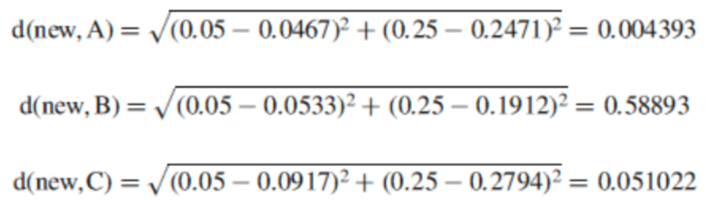

Dibawah ini akan dicari nilai dari distance kuadrat dari tiap data yang nanti akan digunakan untuk mencari nilai vote.

In [53]:
def dif(i, x):
    sum = 0
    for j in range (0, len(baru)-1):
        diff = baru[x][j] - dataset.T[i][j];
        sum += diff * diff
    return sum

Pada tahapan dibawah akan dicari nilai vote dari data baru dengan kelompok yang ada dengan cara menjumlahkan tiap distance data baru degan data pada kelompok. Vote disini merupakan hasil akhir yang menentukan data baru tersebut masuk ke kelompok Diabetes atau Tidak Diabetes. Jika vote Diabetes lebih besar dari vote Tidak Diabetes maka data tersebut masuk ke kelompok Diabetes. Begitu pula sebaliknya.

In [54]:
def knn(x):
    
    diabet = Diabetes[0]    
    sumD = 0
    for i in diabet:
        sumD += 1/dif(i, x)
    
    tdiabet = TidakDiabetes[0]
    sumT = 0
    for i in tdiabet:
        sumT += 1/dif(i, x)
    
    if sumD > sumT:
        diab = 1
        print("Hasil data ke", [x+1], "adalah Diabetes")
    else:
        diab = 0
        print("Hasil data ke", [x+1], "adalah Tidak Diabetes")
    return diab
    
def check(diab):
    if (diab == baru[x][8]):
        print("Analisis data ke", [x+1], "benar")
        salah = 0
    else:
        print("Analisis sata ke", [x+1], "salah")
        salah = 1
    print()
    return salah

Memasukkan data untuk testing

In [55]:
import time
n = 350
baru = dataset.head(n).T
print(baru)
hasil = 0
start = time.time()
for x in baru:
    diab = knn(x)
    hasil += check(diab)
print("Jumlah salah :", hasil)
end = time.time()
print("Waktu yang dibutuhkan untuk algoritma KNN memproses", n, "data adalah", (end - start), "detik atau", (end-start)/60, "menit")

                    0       1        2       3        4        5       6    \
PregTest          6.000   1.000    8.000   1.000    0.000    5.000   3.000   
PlasGluCon      148.000  85.000  183.000  89.000  137.000  116.000  78.000   
DisBloPres       72.000  66.000   64.000  66.000   40.000   74.000  50.000   
TriSkinfoldThi   35.000  29.000   23.000  23.000   35.000   23.000  32.000   
2-HSerIns        30.500  30.500   30.500  94.000  168.000   30.500  88.000   
BMI              33.600  26.600   23.300  28.100   43.100   25.600  31.000   
DiaPedFunc        0.627   0.351    0.672   0.167    2.288    0.201   0.248   
Age              50.000  31.000   32.000  21.000   33.000   30.000  26.000   
Diagnosis         1.000   0.000    1.000   0.000    1.000    0.000   1.000   

                    7        8        9    ...      340     341      342  \
PregTest         10.000    2.000    8.000  ...    1.000   1.000    1.000   
PlasGluCon      115.000  197.000  125.000  ...  130.000  95.000  11

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Hasil data ke [1] adalah Diabetes
Analisis data ke [1] benar



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Hasil data ke [2] adalah Tidak Diabetes
Analisis data ke [2] benar

Hasil data ke [3] adalah Diabetes
Analisis data ke [3] benar

Hasil data ke [4] adalah Tidak Diabetes
Analisis data ke [4] benar

Hasil data ke [5] adalah Diabetes
Analisis data ke [5] benar

Hasil data ke [6] adalah Tidak Diabetes
Analisis data ke [6] benar

Hasil data ke [7] adalah Diabetes
Analisis data ke [7] benar

Hasil data ke [8] adalah Tidak Diabetes
Analisis data ke [8] benar

Hasil data ke [9] adalah Diabetes
Analisis data ke [9] benar

Hasil data ke [10] adalah Diabetes
Analisis data ke [10] benar

Hasil data ke [11] adalah Tidak Diabetes
Analisis data ke [11] benar

Hasil data ke [12] adalah Diabetes
Analisis data ke [12] benar

Hasil data ke [13] adalah Tidak Diabetes
Analisis data ke [13] benar

Hasil data ke [14] adalah Diabetes
Analisis data ke [14] benar

Hasil data ke [15] adalah Diabetes
Analisis data ke [15] benar

Hasil data ke [16] adalah Diabetes
Analisis data ke [16] benar

Hasil data ke [17] a

Hasil data ke [123] adalah Tidak Diabetes
Analisis data ke [123] benar

Hasil data ke [124] adalah Tidak Diabetes
Analisis data ke [124] benar

Hasil data ke [125] adalah Diabetes
Analisis data ke [125] benar

Hasil data ke [126] adalah Diabetes
Analisis data ke [126] benar

Hasil data ke [127] adalah Tidak Diabetes
Analisis data ke [127] benar

Hasil data ke [128] adalah Tidak Diabetes
Analisis data ke [128] benar

Hasil data ke [129] adalah Diabetes
Analisis data ke [129] benar

Hasil data ke [130] adalah Diabetes
Analisis data ke [130] benar

Hasil data ke [131] adalah Diabetes
Analisis data ke [131] benar

Hasil data ke [132] adalah Diabetes
Analisis data ke [132] benar

Hasil data ke [133] adalah Diabetes
Analisis data ke [133] benar

Hasil data ke [134] adalah Tidak Diabetes
Analisis data ke [134] benar

Hasil data ke [135] adalah Tidak Diabetes
Analisis data ke [135] benar

Hasil data ke [136] adalah Tidak Diabetes
Analisis data ke [136] benar

Hasil data ke [137] adalah Tidak D

Hasil data ke [241] adalah Tidak Diabetes
Analisis data ke [241] benar

Hasil data ke [242] adalah Tidak Diabetes
Analisis data ke [242] benar

Hasil data ke [243] adalah Diabetes
Analisis data ke [243] benar

Hasil data ke [244] adalah Diabetes
Analisis data ke [244] benar

Hasil data ke [245] adalah Tidak Diabetes
Analisis data ke [245] benar

Hasil data ke [246] adalah Diabetes
Analisis data ke [246] benar

Hasil data ke [247] adalah Tidak Diabetes
Analisis data ke [247] benar

Hasil data ke [248] adalah Tidak Diabetes
Analisis data ke [248] benar

Hasil data ke [249] adalah Tidak Diabetes
Analisis data ke [249] benar

Hasil data ke [250] adalah Tidak Diabetes
Analisis data ke [250] benar

Hasil data ke [251] adalah Tidak Diabetes
Analisis data ke [251] benar

Hasil data ke [252] adalah Tidak Diabetes
Analisis data ke [252] benar

Hasil data ke [253] adalah Tidak Diabetes
Analisis data ke [253] benar

Hasil data ke [254] adalah Tidak Diabetes
Analisis data ke [254] benar

Hasil data

## Kesimpulan

Kesimpulan dari pembuktian jurnal yang kami gunakan adalah kedua algoritma dapat digunakan untuk penyakit Diabetes dengan kekurangan dan kelabihan masing-masing. Pada jurnal, kedua algoritma tersebut memperoleh tingkat akurasi 91% dengan error 9% dan waktu untuk menjalankan algoritma KNN selama 8 menit.  Namun hasil yang kami peroleh berbeda. Dengan data training sebanyak 768 data dan data testing sebanyak 350 data tingkat akurasi pada Naive Bayes sebesar 72.57 persen sedangkan tingkat akurasi KNN sebesar 100%. Terdapat perbedaan yang cukup besar antara akurasi Naive Bayes dan KNN tersebut. Namun, runtime untuk menjalankan testing pada algoritma Naive Bayes cukup cepat yaitu 3.23 detik dibandingkan dengan algoritma KNN yang membutuhkan 105 detik atau sekitar 17 menit.